In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Xử lý giá trị vô cùng
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)  # Loại bỏ các hàng chứa NaN

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['cluster_agg'] = agg_clustering.fit_predict(data_scaled)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
data['cluster_kmeans'] = kmeans.fit_predict(data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['cluster_dbscan'] = dbscan.fit_predict(data_scaled)

# In ra kết quả
print(data.head())

   Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0               0      36263    1269      25198    9796        106   
1               1       4880     144       2745    1991        117   
2               2      27973    1163      18837    7973        616   
3               3        907      52        803      52         10   
4               4        950      41        242     667         18   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10             18                3.50                  69.49   
1           6             63                2.95                  56.25   
2           8            749                4.16                  67.34   
3           0              0                5.73                  88.53   
4           1              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737  

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

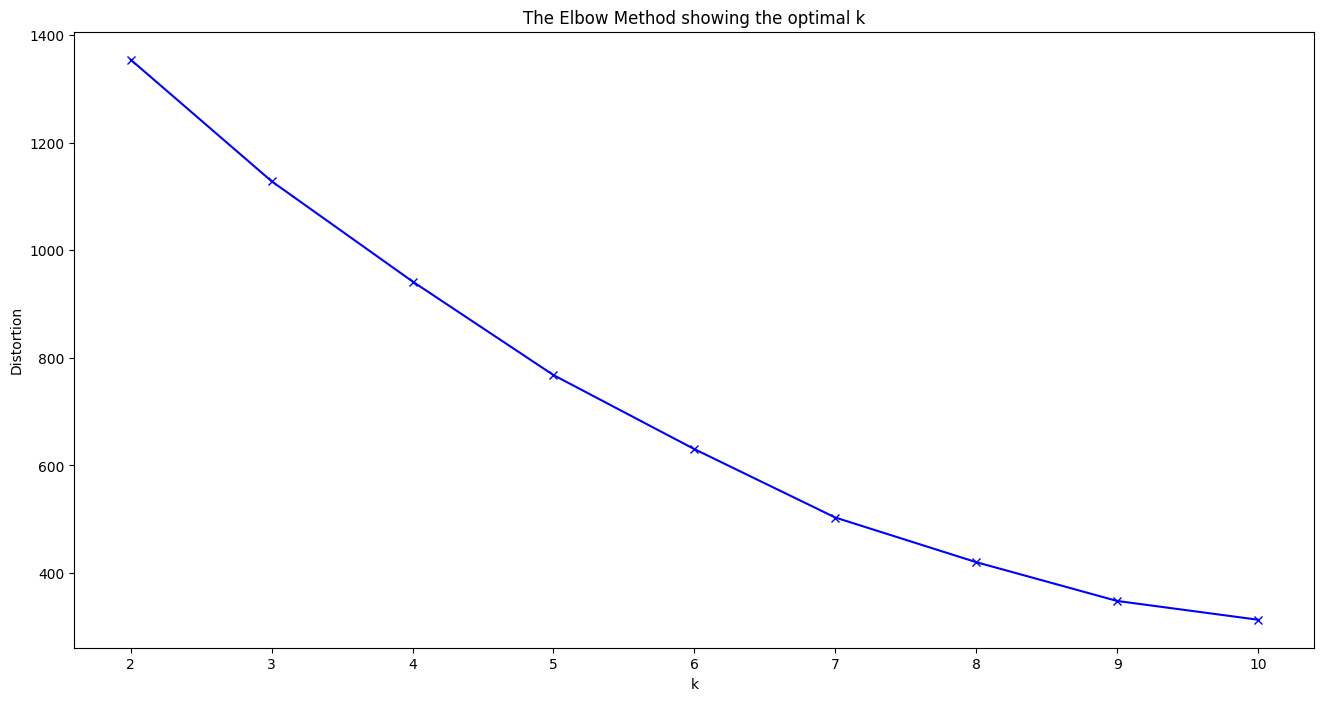

Оптимальное количество кластеров:  10


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import adjusted_rand_score
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('country_wise_latest.csv')

# Lấy nhãn thực sự và chuyển đổi thành dạng số
# Giả sử cột nhãn là 'Country/Region'
true_labels = data['Country/Region'].values
le = LabelEncoder()
true_labels = le.fit_transform(true_labels)

# Loại bỏ cột nhãn khỏi dữ liệu
data = data.drop('Country/Region', axis=1)

# Mã hóa tất cả các cột dạng chuỗi
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Xử lý giá trị vô cùng
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Tính tổng bình phương khoảng cách
distortions = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

# Vẽ biểu đồ phương pháp khuỷu tay
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Tìm và in ra số lượng cụm tối ưu
optimal_k = distortions.index(min(distortions)) + 2
print("Оптимальное количество кластеров: ", optimal_k)

In [3]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Sử dụng số lượng cụm tối ưu cho KMeans
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz cho KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
db_kmeans = davies_bouldin_score(data_scaled, kmeans.labels_)
ch_kmeans = calinski_harabasz_score(data_scaled, kmeans.labels_)
print("Chỉ số Silhouette cho KMeans: ", silhouette_kmeans)
print("Chỉ số Davies-Bouldin cho KMeans: ", db_kmeans)
print("Chỉ số Calinski-Harabasz cho KMeans: ", ch_kmeans)

# Sử dụng số lượng cụm tối ưu cho Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clustering.fit(data_scaled)

# Tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz cho Agglomerative Clustering
silhouette_agg = silhouette_score(data_scaled, agg_clustering.labels_)
db_agg = davies_bouldin_score(data_scaled, agg_clustering.labels_)
ch_agg = calinski_harabasz_score(data_scaled, agg_clustering.labels_)
print("Chỉ số Silhouette cho Agglomerative Clustering: ", silhouette_agg)
print("Chỉ số Davies-Bouldin cho Agglomerative Clustering: ", db_agg)
print("Chỉ số Calinski-Harabasz cho Agglomerative Clustering: ", ch_agg)

# Sử dụng số lượng cụm tối ưu cho Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_scaled.T, optimal_k, 2, error=0.005, maxiter=1000, init=None)

# Tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz cho Fuzzy C-means
silhouette_fuzzy_cmeans = silhouette_score(data_scaled, np.argmax(u, axis=0))
db_fuzzy_cmeans = davies_bouldin_score(data_scaled, np.argmax(u, axis=0))
ch_fuzzy_cmeans = calinski_harabasz_score(data_scaled, np.argmax(u, axis=0))
print("Chỉ số Silhouette cho Fuzzy C-means: ", silhouette_fuzzy_cmeans)
print("Chỉ số Davies-Bouldin cho Fuzzy C-means: ", db_fuzzy_cmeans)
print("Chỉ số Calinski-Harabasz cho Fuzzy C-means: ", ch_fuzzy_cmeans)

# DBSCAN không sử dụng số lượng cụm tối ưu, vì nó không yêu cầu số lượng cụm trước
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['cluster_dbscan'] = dbscan.fit_predict(data_scaled)

# Kiểm tra số lượng cụm được tạo ra
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Number of clusters: ', n_clusters)

# Nếu có nhiều hơn 1 cụm, tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan.labels_)
    db_dbscan = davies_bouldin_score(data_scaled, dbscan.labels_)
    ch_dbscan = calinski_harabasz_score(data_scaled, dbscan.labels_)
    print("Chỉ số Silhouette cho DBSCAN: ", silhouette_dbscan)
    print("Chỉ số Davies-Bouldin cho DBSCAN: ", db_dbscan)
    print("Chỉ số Calinski-Harabasz cho DBSCAN: ", ch_dbscan)
else:
    print("Không thể tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz cho DBSCAN vì chỉ có một cụm.")


Chỉ số Silhouette cho KMeans:  0.3014398699556736
Chỉ số Davies-Bouldin cho KMeans:  0.6641237191062234
Chỉ số Calinski-Harabasz cho KMeans:  144.68451543171918
Chỉ số Silhouette cho Agglomerative Clustering:  0.25505754896510785
Chỉ số Davies-Bouldin cho Agglomerative Clustering:  0.6648865013430608
Chỉ số Calinski-Harabasz cho Agglomerative Clustering:  132.94215604413233
Chỉ số Silhouette cho Fuzzy C-means:  0.15466339462847503
Chỉ số Davies-Bouldin cho Fuzzy C-means:  1.323979716081836
Chỉ số Calinski-Harabasz cho Fuzzy C-means:  58.2460923091287
Number of clusters:  1
Không thể tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz cho DBSCAN vì chỉ có một cụm.


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


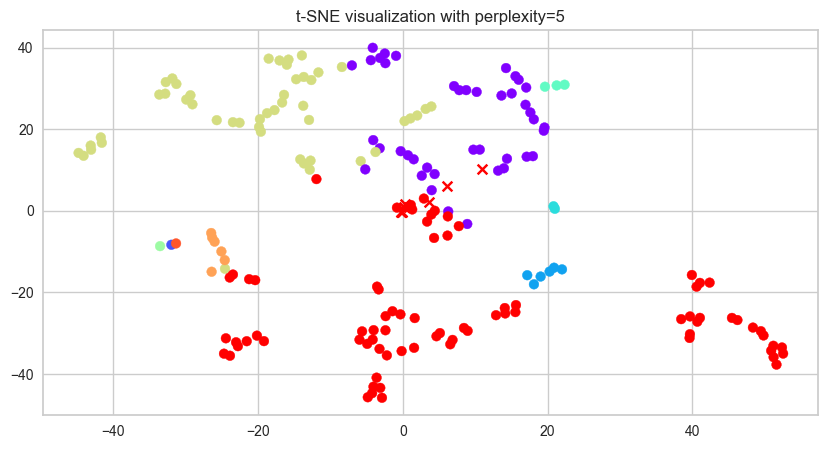

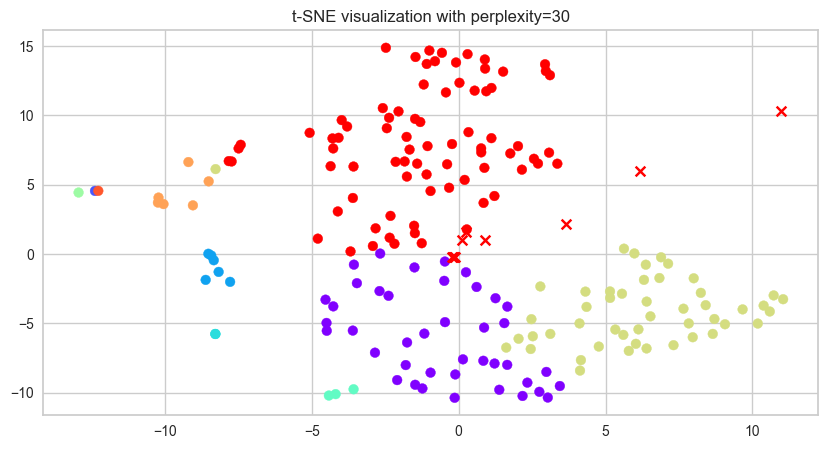

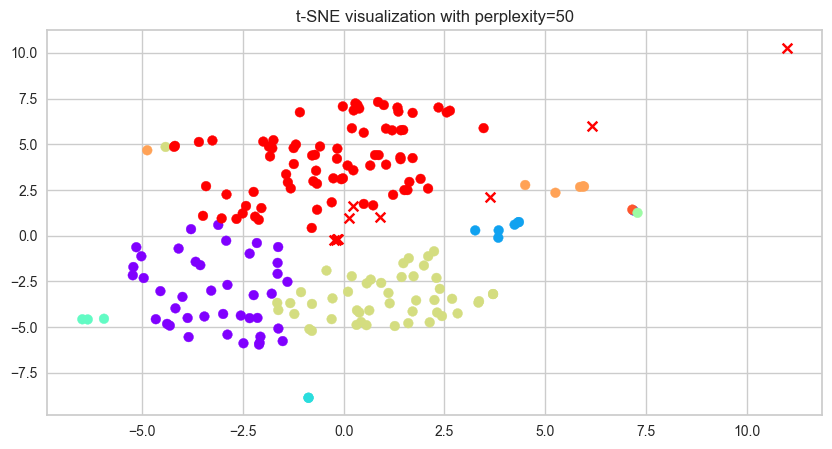

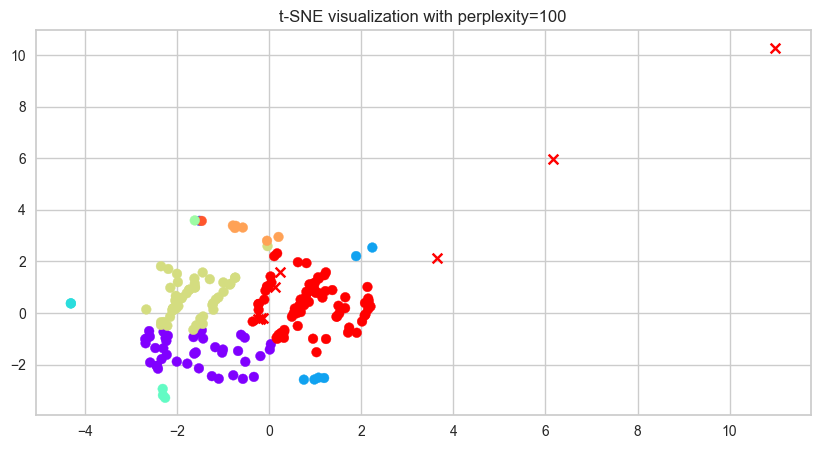

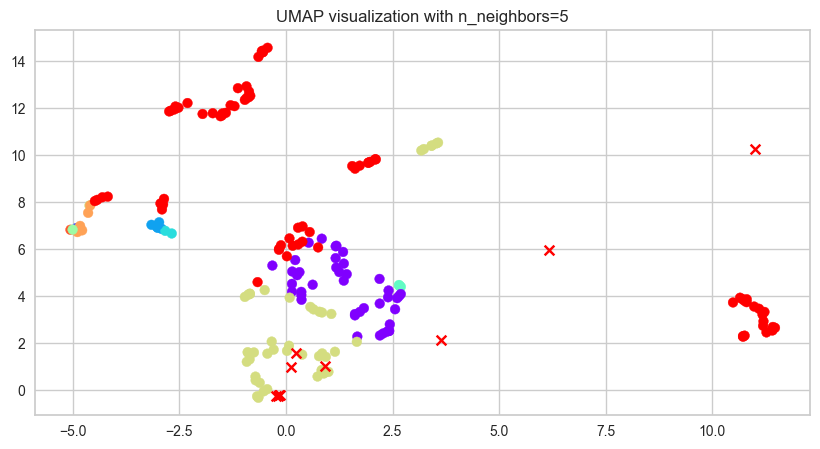

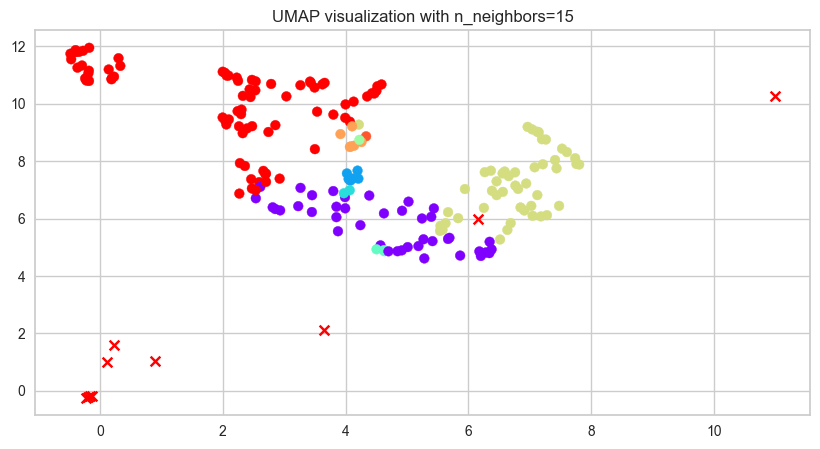

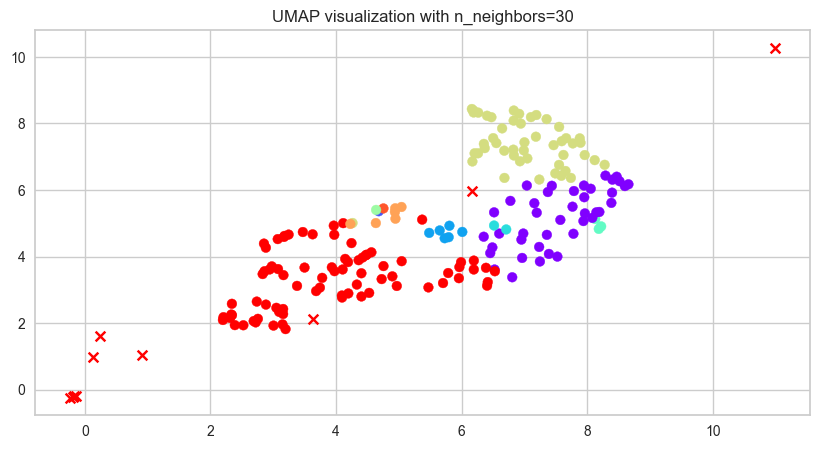

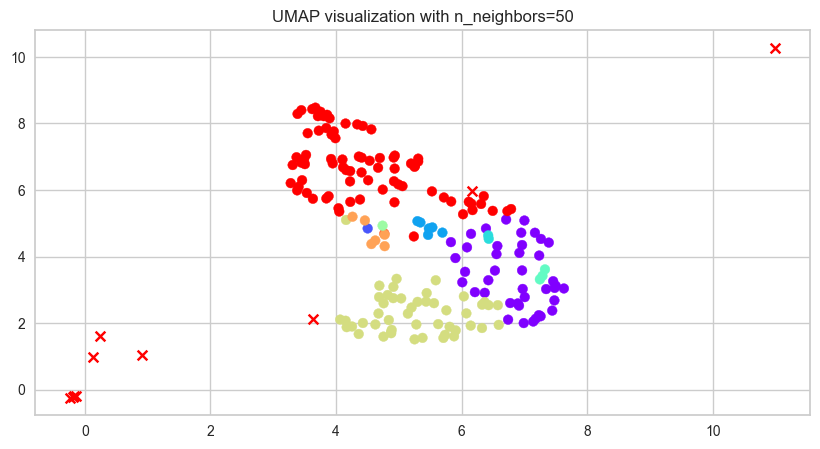

In [4]:
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Phân cụm dữ liệu bằng KMeans với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Tạo một bản đồ màu
colors = cm.rainbow(np.linspace(0, 1, optimal_k))

# Sử dụng t-SNE và UMAP để giảm kích thước dữ liệu
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    data_tsne = tsne.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=colors[kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title(f't-SNE visualization with perplexity={perplexity}')
    plt.show()

for n_neighbors in [5, 15, 30, 50]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    data_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=colors[kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title(f'UMAP visualization with n_neighbors={n_neighbors}')
    plt.show()

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


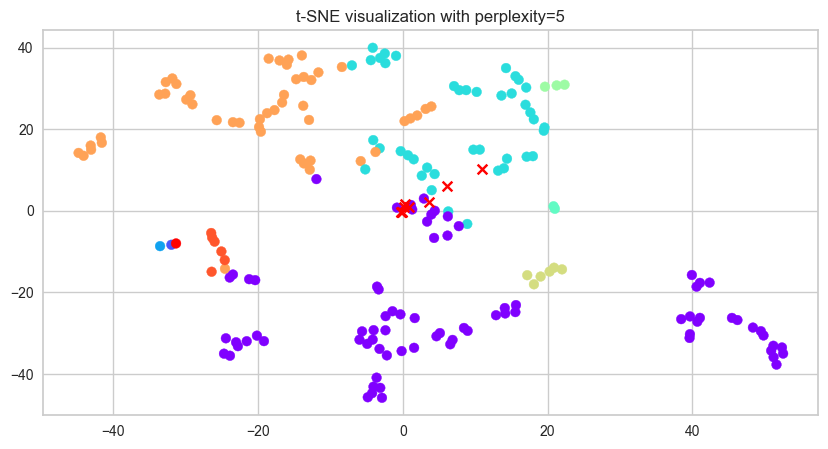

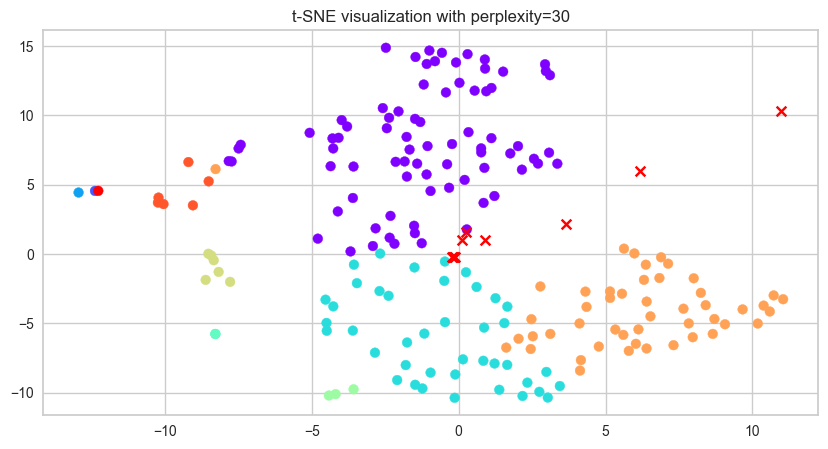

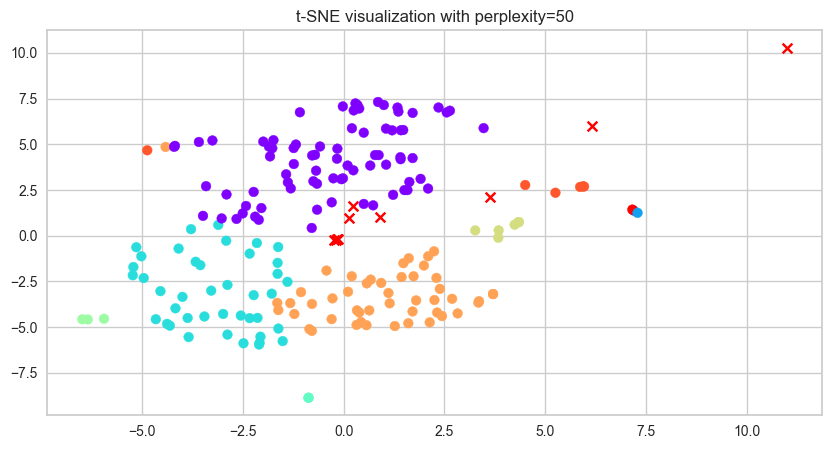

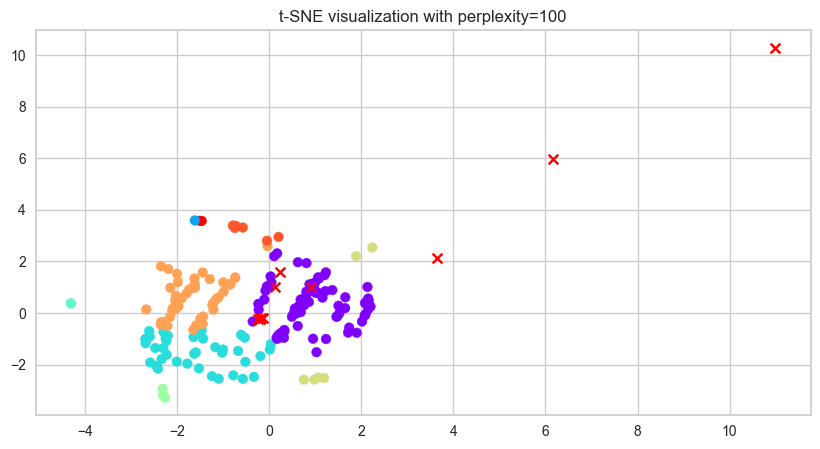

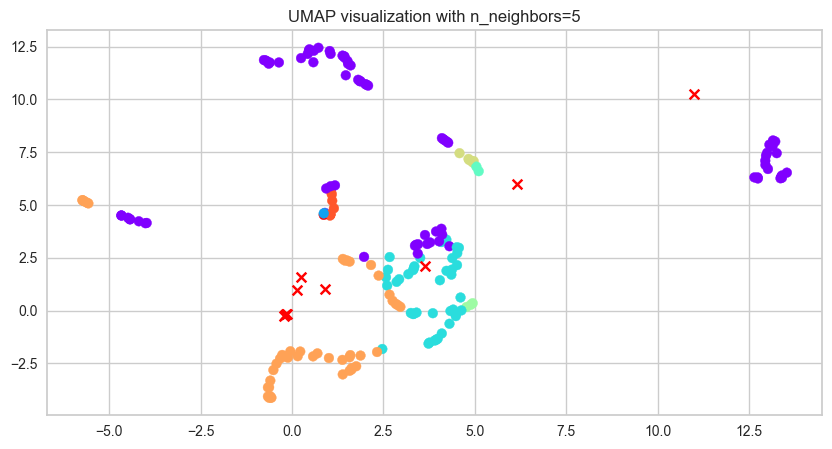

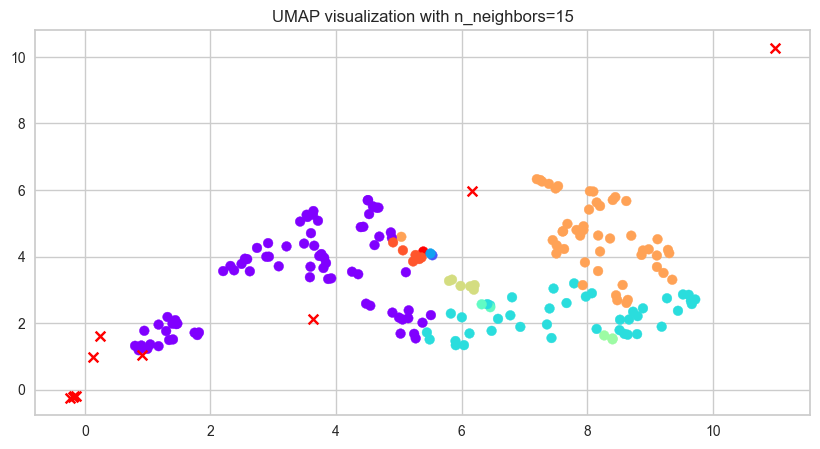

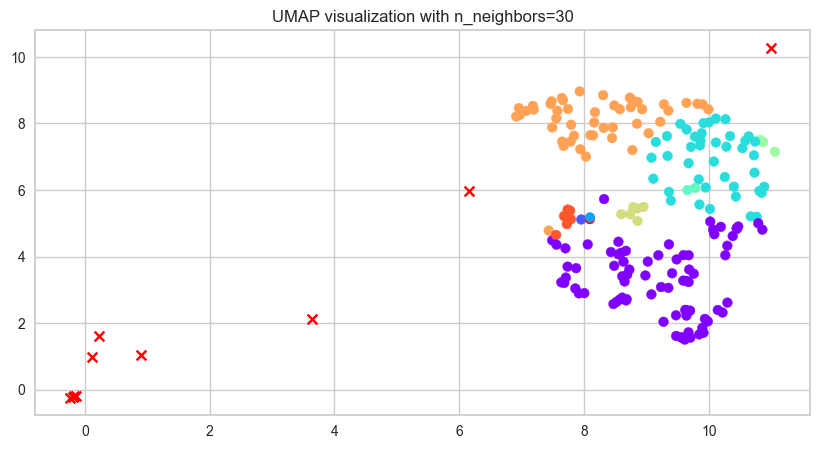

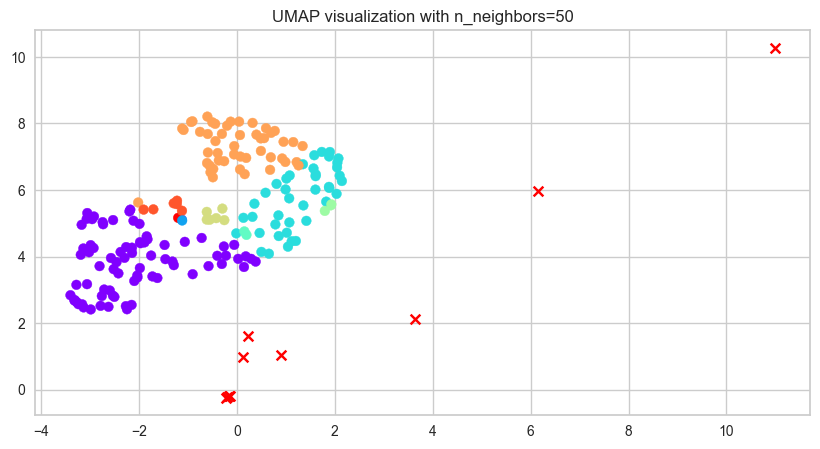

In [5]:
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Phân cụm dữ liệu bằng KMeans với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Tạo một bản đồ màu
colors = cm.rainbow(np.linspace(0, 1, optimal_k))

# Sử dụng t-SNE và UMAP để giảm kích thước dữ liệu
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    data_tsne = tsne.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=colors[kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title(f't-SNE visualization with perplexity={perplexity}')
    plt.show()

for n_neighbors in [5, 15, 30, 50]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    data_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=colors[kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title(f'UMAP visualization with n_neighbors={n_neighbors}')
    plt.show()

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


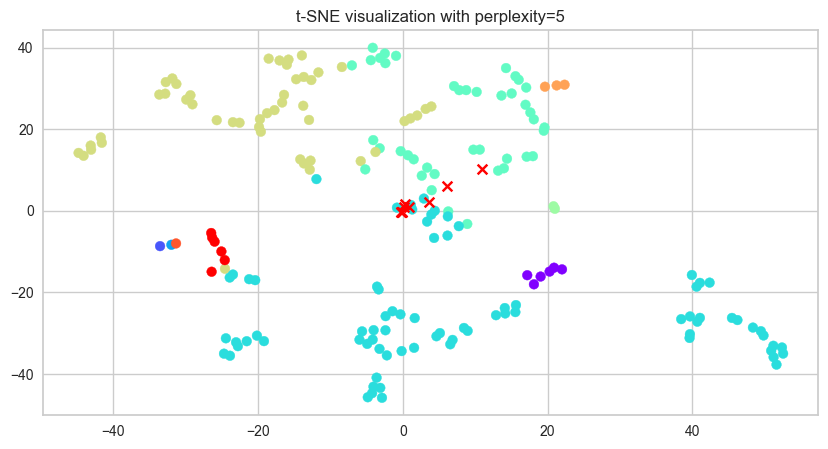

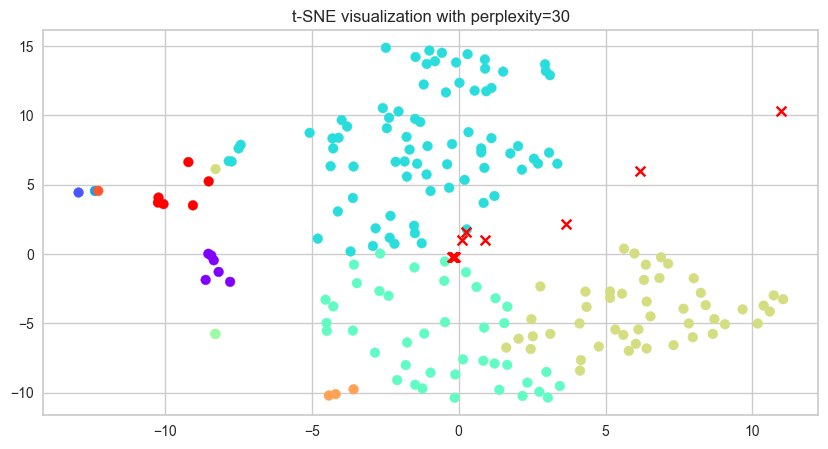

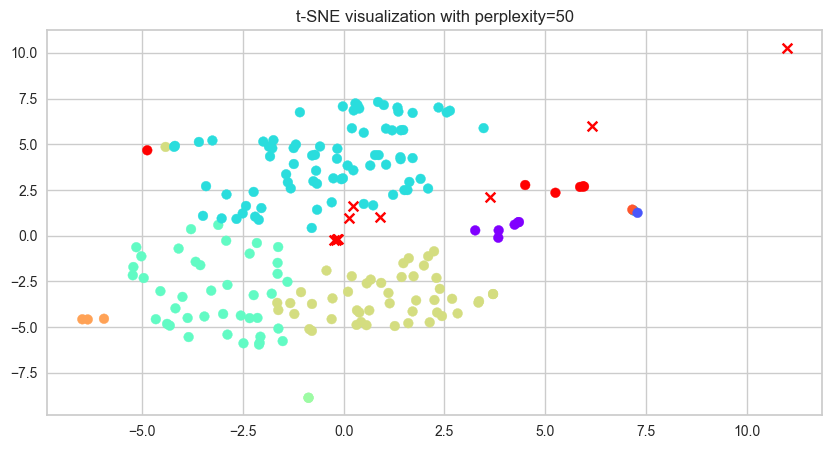

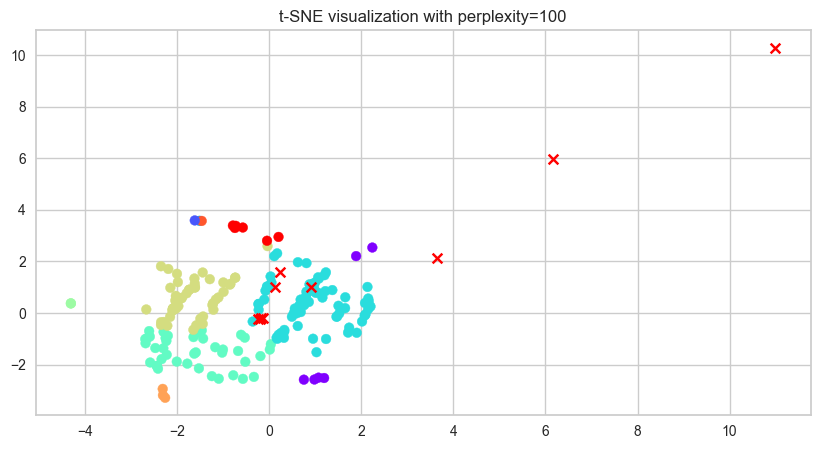

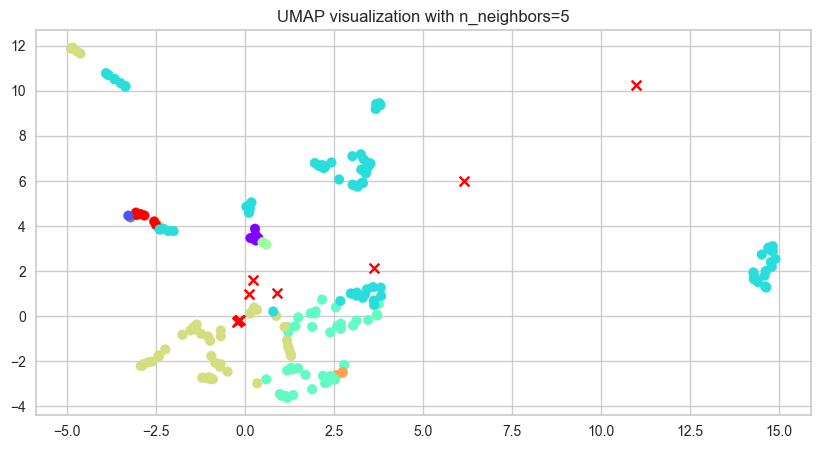

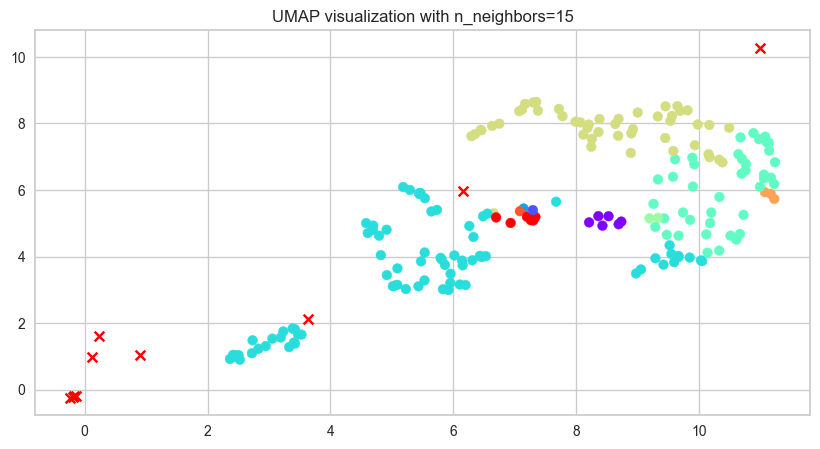

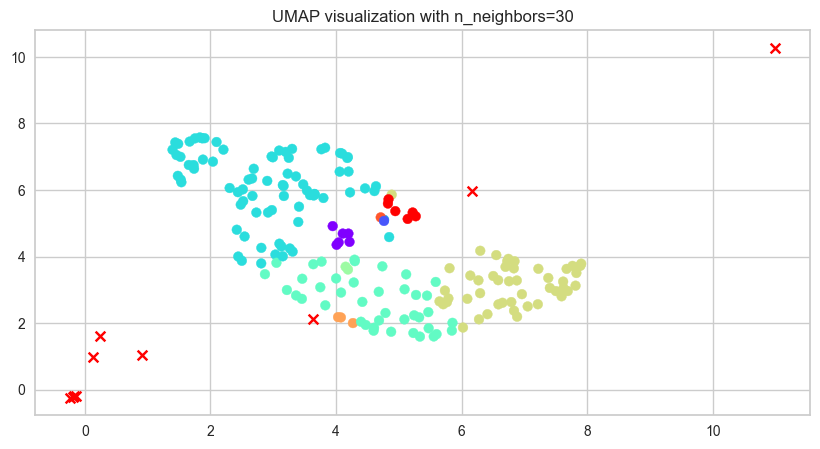

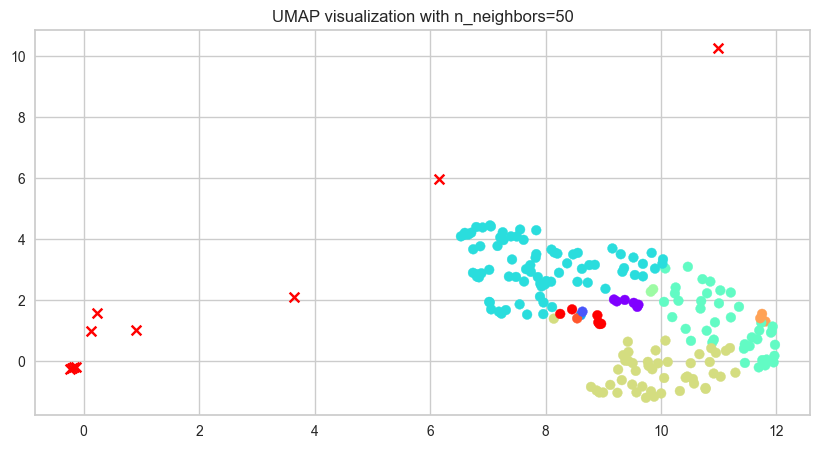

In [6]:
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Phân cụm dữ liệu bằng KMeans với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Tạo một bản đồ màu
colors = cm.rainbow(np.linspace(0, 1, optimal_k))

# Sử dụng t-SNE và UMAP để giảm kích thước dữ liệu
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    data_tsne = tsne.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=colors[kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title(f't-SNE visualization with perplexity={perplexity}')
    plt.show()

for n_neighbors in [5, 15, 30, 50]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    data_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=colors[kmeans.labels_])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    plt.title(f'UMAP visualization with n_neighbors={n_neighbors}')
    plt.show()